In [1]:
cd ..

/home/aga/fixated_eye_model


In [2]:
import os
import pandas as pd
from src.analyzer import *
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
output_dir = 'output/motion_benefit2'

In [3]:
def plot_fill_between(t, data, label='', c = None, k=1.):
    """
    Create a plot of the data +/- k standard deviations.
    
    Parameters
    ----------
    t : array, shape (timesteps, )
        Times for each data point
    data : array, shape (samples, timesteps)
        Data to plot mean and +/- one sdev as a function of time
    k : float
        Scaling factor for standard deviations
    """
    mm = data.mean(0)
    sd = data.std(0) * k
    plt.fill_between(t, mm-sd, mm + sd, alpha=0.5, color=c)
    plt.plot(t, mm, color=c, label=label)

In [4]:
pkl_fns = [os.path.join(output_dir, fn) 
           for fn in os.listdir(output_dir) 
           if fn.endswith('.pkl')]
pkl_fns.sort()
# pkl_fns = pkl_fns[120:]
len(pkl_fns)

OSError: [Errno 2] No such file or directory: 'output/motion_benefit2'

In [5]:
da_ = [DataAnalyzer.fromfilename(pkl_fn) for pkl_fn in pkl_fns]
t = da_[0].time_list()

In [7]:
out_ = []
# for da in da_:
for pkl_fn in pkl_fns:
    da = DataAnalyzer.fromfilename(pkl_fn)
    out = []
    out.append(da.data['EM_data']['mode']) # Eye path given or not
    out.append(da.data['motion_gen']['mode']) # True eye movements or no eye movements
    out.append(da.data['ds']) # Image size
    out = out + da.snr_list()
    out_.append(out)

In [8]:
t = da.time_list()

In [9]:
data = pd.DataFrame.from_records(out_, columns=['inference_mode', 'motion_gen', 'ds'] + list(t))
# data = data[data['ds'] == 0.75]
grouped = pd.groupby(data, ['inference_mode', 'motion_gen', 'ds'])
c_ = ['g', 'b', 'r', 'y', 'm', 'c']
c_ = c_ + c_

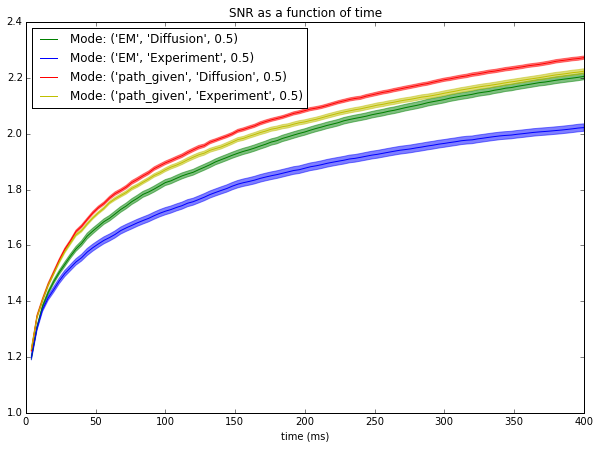

In [11]:
plt.figure(figsize=(10, 7))
plt.title('SNR as a function of time')
for c, (name, group) in zip(c_, grouped):
    label = 'Mode: {}'.format(name)
    plot_fill_between(t, group[list(t)], label=label, c=c, k=0.1)
    plt.xlabel('time (ms)')
plt.legend(loc='upper left')
# plt.savefig(os.path.join(output_dir, 'motion_benefit.png'), dpi=200)

In [41]:
da_[10].data['motion_gen']

{'dc': 0.001, 'mode': 'Diffusion'}

In [13]:
np.sqrt(0.001 * 0.5)

0.022360679774997897

In [ ]:
mp.random.rand?

In [15]:
np.random.rand(2)

array([ 0.37531929,  0.43545298])

In [35]:
da = da_[0]

KeyError: 'path_means'

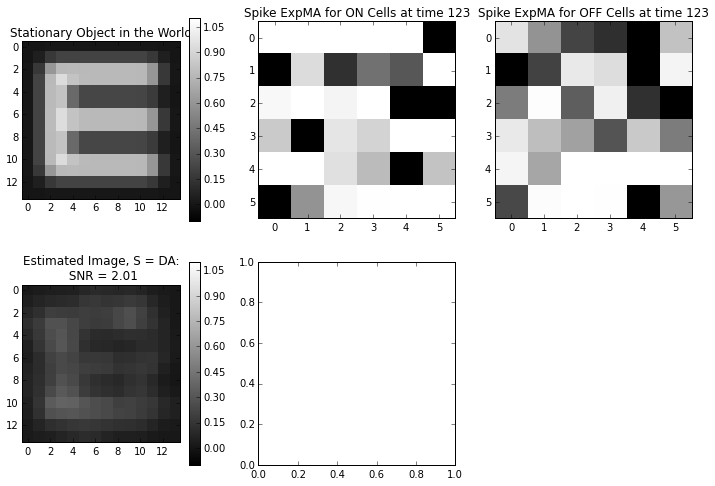

In [36]:
da.plot_EM_estimate(30)

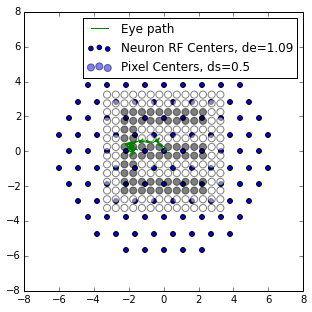

In [37]:
da_[0].plot_image_and_rfs(s=50)

In [13]:
def plot_high_res(s_gen, xs, ys, sdev, n = 40):
    """
    Plot a sum of Gaussians with given weights and centers.
    
    Parameters
    ----------
    s_gen : array, shape (n_pix,)
        Values of pixels.
    xs, ys : array, shape (n_pix,)
        X and Y locations of the pixels.
    sdev : float
        Standard deviation of the Gaussians
    n : int
        Number of samples to get for sum of Gaussians

    Returns
    -------
    res : float array, shape (n, n)
        Image of the sum of Gaussians
    """
    m1, m2 = xs.min(), xs.max()
    xx = np.arange(m1, m2, (m2 - m1) / n)
    XX, YY = np.meshgrid(xx, xx)
    XX, YY = [u.ravel()[np.newaxis, :] for u in [XX, YY]]
    XS, YS, S_gen = [u[:, np.newaxis] for u in [xs, ys, s_gen]]
    res = np.sum(S_gen * np.exp(((XS-XX) ** 2 + (YS - YY) ** 2) / (-2 * sdev ** 2)), axis=0)
    return res.reshape(n, n)

In [41]:
out =  plot_high_res(da.S_gen.ravel(), 
                     da.XS, da.YS, da.data['ds'] / np.sqrt(2), n=100)
out1 = plot_high_res(da.data['EM_data'][99]['image_est'].ravel(), 
                     da.XS, da.YS, da.data['ds'] / np.sqrt(2), n=100)

In [48]:
[(u.ravel()).sum() for u in [da.S_gen, da.data['EM_data'][99]['image_est']]]

[68.0, 58.741913]

<matplotlib.colorbar.Colorbar instance at 0x7fdafce9bc68>

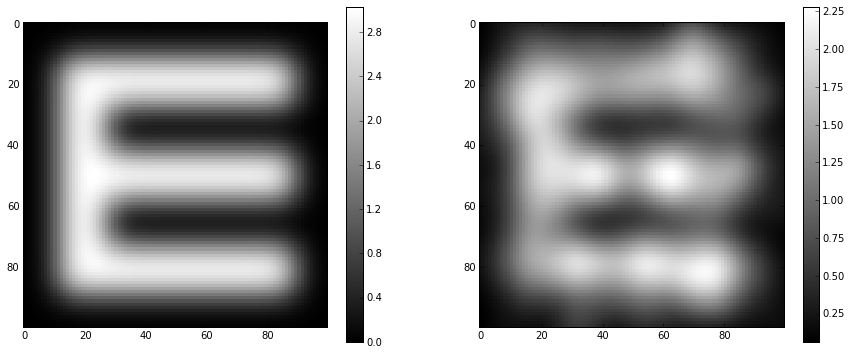

In [51]:
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.imshow(out)
plt.colorbar()
plt.subplot(122)
plt.imshow(out1)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fdafd246998>

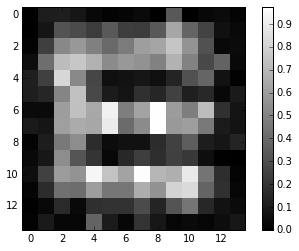

In [49]:
# da = da_[50]
q = 99
S_est = da.data['EM_data'][q]['image_est']

plt.imshow(gaussian_filter(S_est, da.blur_sdev * 0.001),
           cmap=plt.cm.gray, interpolation='nearest')
plt.colorbar()


# Group SNR plots by image size and diffusion constant

In [ ]:
out_ = []
for pkl_fn in pkl_fns:
    da = DataAnalyzer.fromfilename(pkl_fn)
    out = [da.data['ds'], da.data['motion_gen']['dc']]
    out = out + da.SNR_list()
    out_.append(out)

In [ ]:
t = da_[0].time_list()

In [ ]:
data = pd.DataFrame.from_records(out_, columns=['ds', 'dc_gen'] + list(t))
# data = data[data['ds'] == 0.5]

In [ ]:
grouped = pd.groupby(data, ['ds', 'dc_gen'])
c_ = ['g', 'b', 'r', 'y', 'm', 'c']

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('SNR as a function of time')
for c, (name, group) in zip(c_, grouped):
    label = 'ds={}, dc={}'.format(*name)
    plot_fill_between(t, group[list(t)], label=label, c=c)
plt.legend(loc='upper left')
# plt.savefig(os.path.join(output_dir, 'motion_benefit.png'), dpi=200)